## code for plotting all past years of OCG beach profile 
Using .csv file to complete this 

In [1]:
import pandas as pd 
import numpy as np  
import csv
import matplotlib.pyplot as plt

In [9]:
def read_data_ind(csv_file):
    df = pd.read_csv(csv_file)
    return df

In [16]:
# Caladesi island data
df_2019 = read_data_ind('2019_OCG_profile.csv')
df_2021 = read_data_ind('2021_OCG_profile.csv')
df_2022 = read_data_ind('2022_OCG_profile.csv')
df_2024 = read_data_ind('2024_OCG_profile.csv')

In [ ]:
# honeymoon island data


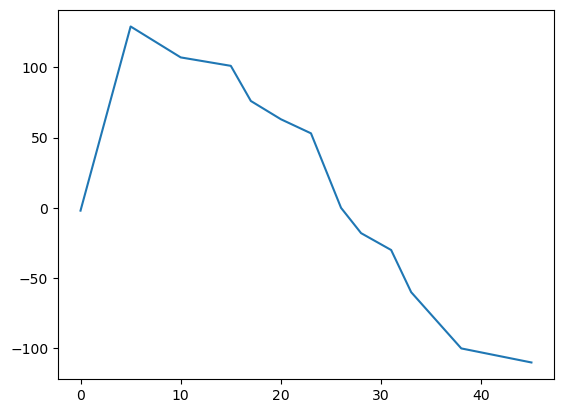

In [15]:
plt.plot(df_2019.X,df_2019.Y)

In [15]:
# import file from GitHub
OCG2019_profile = pd.read_csv(r"2019_OCG_profile.csv")
OCG2021_profile = pd.read_csv(r'2021_OCG_profile.csv')
OCG2022_profile = pd.read_csv(r'2022_OCG_profile.csv')
OCG2024_profile = pd.read_csv(r'2024_OCG_profile.csv')

Data_list = [OCG2019_profile,OCG2021_profile,OCG2022_profile,OCG2024_profile]  
Years_list = [2019,2021,2022,2024]                 

In [13]:
def plot_line_graphs(Data_list,years_list):
    fig,ax = plt.subplots()
    for data in enumerate(Data_list):
        ax.plot(data.X,data.Y)

AttributeError: 'tuple' object has no attribute 'X'

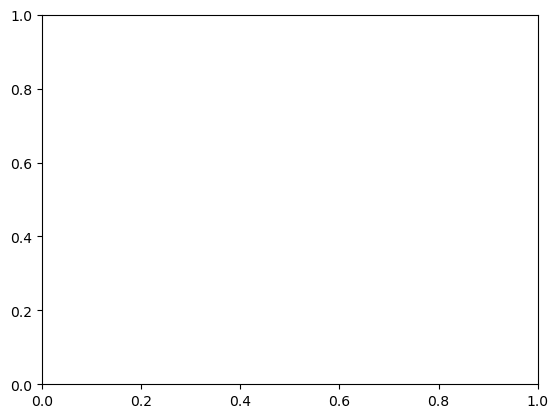

In [16]:
plot_line_graphs(Data_list,Years_list)